In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt


In [2]:
from tensorflow.keras.datasets import fashion_mnist
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [4]:
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


In [10]:
print(x_train[3])

[[  0   0   0   0   0   0   0   0  33  96 175 156  64  14  54 137 204 194
  102   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  73 186 177 183 175 188 232 255 223 219 194 179
  186 213 146   0   0   0   0   0   0   0]
 [  0   0   0   0   0  35 163 140 150 152 150 146 175 175 173 171 156 152
  148 129 156 140   0   0   0   0   0   0]
 [  0   0   0   0   0 150 142 140 152 160 156 146 142 127 135 133 140 140
  137 133 125 169  75   0   0   0   0   0]
 [  0   0   0   0   0  54 167 146 129 142 137 137 131 148 148 133 131 131
  131 125 140 140   0   0   0   0   0   0]
 [  0   0   0   0   0   0 110 188 133 146 152 133 125 127 119 129 133 119
  140 131 150  14   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 221 158 137 135 123 110 110 114 108 112 117
  127 142  77   0   0   0   0   0   0   0]
 [  0   0   0   0   0   4   0  25 158 137 125 119 119 110 117 117 110 119
  127 144   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 123 156 129 112 110 102 112 10

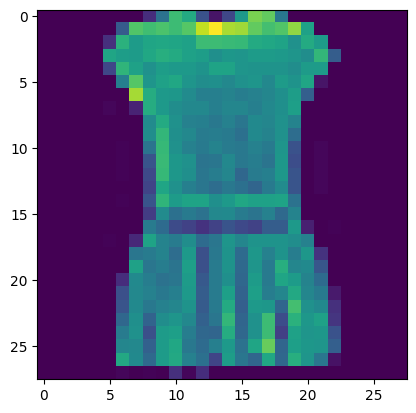

In [9]:
plt.imshow(x_train[3])

In [11]:
print(y_train[3])

3


In [12]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [13]:
x_train=x_train/255.0
x_test=x_test/255.0

In [14]:
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [15]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [17]:
from tensorflow.keras.models import Sequential


In [18]:
import tensorflow as tf
model = Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(28,28,1)))
model.add(tf.keras.layers.Conv2D(filters=10,kernel_size=3,strides=(1,1),padding='valid',activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(filters=10,kernel_size=3,strides=(1,1),padding='valid',activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(filters=10,kernel_size=3,strides=(1,1),padding='valid',activation='softmax'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='sigmoid'))


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 10)        100       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 10)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 10)        910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 10)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 10)          910       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 10)          0

In [20]:
import tensorflow
model.compile(optimizer='adam',loss=tensorflow.keras.losses.categorical_crossentropy,metrics=['acc'])

In [21]:
x_train=x_train.reshape((60000,28,28,1))
x_test=x_test.reshape((10000,28,28,1))


In [22]:
history=model.fit(x_train,y_train,epochs=30,batch_size=512,validation_data=(x_test,y_test))

Epoch 1/30
118/118 [==============================] - 28s 222ms/step - loss: 1.8978 - acc: 0.3079 - val_loss: 1.2493 - val_acc: 0.4860
Epoch 2/30
118/118 [==============================] - 21s 174ms/step - loss: 1.0296 - acc: 0.5999 - val_loss: 0.9033 - val_acc: 0.6550
Epoch 3/30
118/118 [==============================] - 21s 179ms/step - loss: 0.8182 - acc: 0.6980 - val_loss: 0.7783 - val_acc: 0.7146
Epoch 4/30
118/118 [==============================] - 19s 163ms/step - loss: 0.7314 - acc: 0.7278 - val_loss: 0.7285 - val_acc: 0.7308
Epoch 5/30
118/118 [==============================] - 22s 184ms/step - loss: 0.6887 - acc: 0.7390 - val_loss: 0.7037 - val_acc: 0.7335
Epoch 6/30
118/118 [==============================] - 21s 176ms/step - loss: 0.6631 - acc: 0.7487 - val_loss: 0.6783 - val_acc: 0.7431
Epoch 7/30
118/118 [==============================] - 19s 162ms/step - loss: 0.6459 - acc: 0.7544 - val_loss: 0.6728 - val_acc: 0.7493
Epoch 8/30
118/118 [==============================] - 2

In [27]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])